In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset
data = pd.read_csv('asthma_data_1.csv')
data.head()

,ALF_PE,GNDR_CD,BMI,SMK_STATUS,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,EMER_ADM_LAST_12M,EMER_ADM_BEFORE_LAST_12M,ASTHMA_EXACERBATIONS,ASTHMA_REVIEWS,...,Income,Employment,Health,Education,Access_to_Services,Community_Safety,Physical_Environment,Housing,WIMD_2019_LSOA_CODES,FIRST_ADMISSION_WITHIN_STUDY_YEARS
0,58334qiB,0,46.6,No,6,4,0,7,1,2,...,1097,998,1347,1255,445,1656,1653,378,W01000002,2019
1,30285EUD,1,34.4,No,6,2,1,6,0,4,...,483,607,450,620,628,392,1387,219,W01000003,2018
2,25529abW,1,55.9,Yes,4,3,0,5,1,1,...,1110,948,1254,1158,338,1180,1789,1033,W01000004,2018
3,66633xMA,0,27.0,No,7,4,1,7,0,3,...,1110,948,1254,1158,338,1180,1789,1033,W01000004,2018
4,34294yWu,0,47.6,No,2,1,0,3,0,1,...,1019,1242,1571,964,909,1063,804,500,W01000005,2020


In [3]:
data.rename({'FIRST_ADMISSION_WITHIN_STUDY_YEARS':'YEAR'},inplace=True,axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ALF_PE                    1500 non-null   object 
 1   GNDR_CD                   1500 non-null   int64  
 2   BMI                       1500 non-null   float64
 3   SMK_STATUS                1500 non-null   object 
 4   ASTHMA_GP_VISITS          1500 non-null   int64  
 5   TOTAL_ASTHMA_HOSP         1500 non-null   int64  
 6   EMER_ADM_LAST_12M         1500 non-null   int64  
 7   EMER_ADM_BEFORE_LAST_12M  1500 non-null   int64  
 8   ASTHMA_EXACERBATIONS      1500 non-null   int64  
 9   ASTHMA_REVIEWS            1500 non-null   int64  
 10  ASTHMA_OUTPATIENT_APPO    1500 non-null   int64  
 11  ASTHMA_RE_ADMISSIONS      1500 non-null   int64  
 12  TOTAL_PRESCRIPTIONS       1500 non-null   int64  
 13  Income                    1500 non-null   int64  
 14  Employme

In [5]:
data = data[data['YEAR']!=0].copy()


#make sure at least a patient has a recorded admission between 2018 and 2023. The study period

In [6]:
data['YEAR'] = data['YEAR'].astype('category')

In [7]:
#asthma outcomes
cluster_data = data[['ASTHMA_GP_VISITS', 
                        'TOTAL_ASTHMA_HOSP',
                        'ASTHMA_REVIEWS',
                        'ASTHMA_OUTPATIENT_APPO',
                        'TOTAL_PRESCRIPTIONS',
                        'ASTHMA_RE_ADMISSIONS',
                        'ASTHMA_EXACERBATIONS'
                        ]].copy()

In [8]:
quintiles = pd.read_csv('quintiles.csv')

In [9]:
data = data.merge(quintiles, left_on='WIMD_2019_LSOA_CODES', right_on='LSOA Code').drop('LSOA Code',axis=1).copy()

In [10]:
data['Quintile'] = data['Quintile'].astype('category')

# CLUSTERING

In [11]:
cluster_data

,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,ASTHMA_REVIEWS,ASTHMA_OUTPATIENT_APPO,TOTAL_PRESCRIPTIONS,ASTHMA_RE_ADMISSIONS,ASTHMA_EXACERBATIONS
0,6,4,2,3,10,1,1
1,6,2,4,0,7,2,0
2,4,3,1,2,7,0,1
3,7,4,3,1,8,0,0
4,2,1,1,1,4,1,0
...,...,...,...,...,...,...,...
1495,7,4,3,1,8,0,0
1496,3,2,1,1,4,0,0
1497,3,1,2,0,6,0,1
1498,5,4,0,3,9,1,0


##### preprocessing: standardization to numerical features

In [12]:
from sklearn.preprocessing import MinMaxScaler #using MinMaxScaler

In [13]:
scaler = MinMaxScaler() #an instance of MinMaxScaler class

In [14]:
cluster_data_prepared = scaler.fit_transform(cluster_data) #applying MinMaxScaler

In [15]:
#view preprocessed data in dataframe
df_cluster_prepared = pd.DataFrame(cluster_data_prepared,columns=cluster_data.columns)
df_cluster_prepared

,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,ASTHMA_REVIEWS,ASTHMA_OUTPATIENT_APPO,TOTAL_PRESCRIPTIONS,ASTHMA_RE_ADMISSIONS,ASTHMA_EXACERBATIONS
0,0.428571,0.4,0.285714,0.6,0.600000,0.333333,0.25
1,0.428571,0.2,0.571429,0.0,0.400000,0.666667,0.00
2,0.285714,0.3,0.142857,0.4,0.400000,0.000000,0.25
3,0.500000,0.4,0.428571,0.2,0.466667,0.000000,0.00
4,0.142857,0.1,0.142857,0.2,0.200000,0.333333,0.00
...,...,...,...,...,...,...,...
1486,0.500000,0.4,0.428571,0.2,0.466667,0.000000,0.00
1487,0.214286,0.2,0.142857,0.2,0.200000,0.000000,0.00
1488,0.214286,0.1,0.285714,0.0,0.333333,0.000000,0.25
1489,0.357143,0.4,0.000000,0.6,0.533333,0.333333,0.00


In [16]:
#using kmeans clsutering to create clusters based on clinical outcomes of patients
from sklearn.cluster import KMeans 

##### checking the number of appropriate clusters


##### 1. using inertia


In [17]:
inertia = []

for i in range(2,8):
    kmeans_inertia = KMeans(n_clusters=i)
    kmeans_inertia.fit(cluster_data_prepared)
    inertia.append(kmeans_inertia.inertia_)
    
print(f"Inertia: {inertia}")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

Inertia: [255.38763704928675, 222.84972211558323, 198.94198196236388, 179.92900244549938, 164.37478104682683, 151.24481947717095]


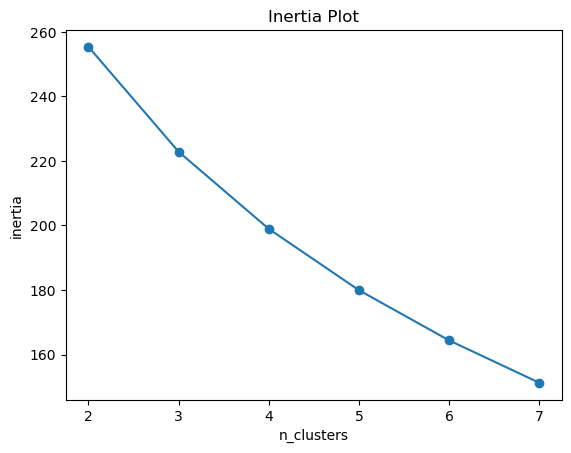

In [18]:
plt.scatter(range(2,8), inertia)
plt.plot(range(2,8), inertia)
plt.title('Inertia Plot')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

##### 2. using silhouette scores

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette = []

for s in range(2,8):
    kmeans_silhouette = KMeans(n_clusters=s)
    kmeans_silhouette.fit(cluster_data_prepared)
    silhouette.append(silhouette_score(cluster_data_prepared, kmeans_silhouette.labels_, metric='euclidean'))

print(f"Silhouette_scores: {silhouette}")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

Silhouette_scores: [0.21019615858299168, 0.19224246647396748, 0.19670860313927466, 0.2010722084325315, 0.1822811477379009, 0.1952935608145992]


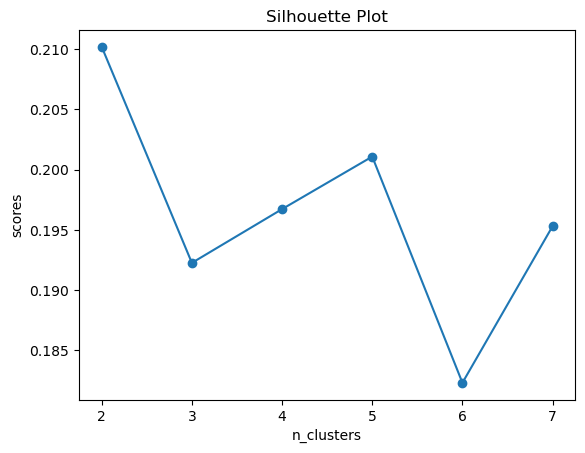

In [21]:
plt.scatter(range(2,8), silhouette)
plt.plot(range(2,8), silhouette)
plt.title('Silhouette Plot')
plt.xlabel('n_clusters')
plt.ylabel('scores')
plt.show()

2 clusters indicated by the silhouette scores

##### choosing 2 clusters

In [22]:
k_means = KMeans(n_clusters=2) #using 2 clusters

In [23]:
k_means.fit(cluster_data_prepared)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [24]:
cluster_predictions = k_means.predict(cluster_data_prepared) #prediction of clusters 

In [25]:
#number of observations in clusters
pd.Series(cluster_predictions).value_counts()

0    824
1    667
dtype: int64

# Heatmap-Mean values of features. This shows how features differ across clusters

In [26]:
cluster_data['cluster'] = k_means.labels_

In [27]:
cluster_means = cluster_data.groupby('cluster').mean().T

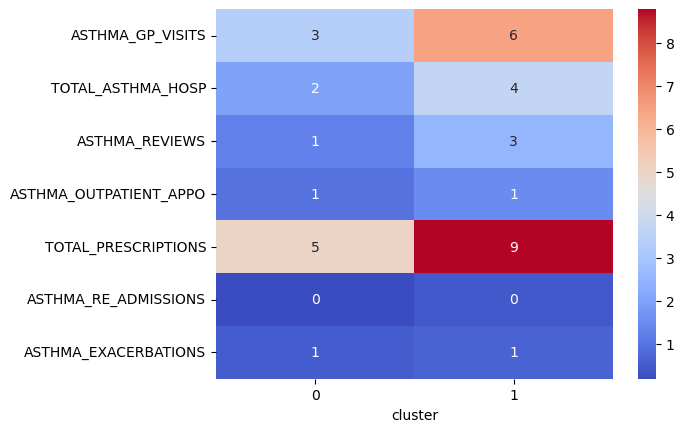

In [28]:
sns.heatmap(cluster_means, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()


#shows how they vary across clusters

# FEATURE IMPORTANCE-PREDICTING CLUSTERS USING INPUT FEATURES. THIS INDICATES WHICH VARIABLES ARE DRIVING THE CLUSTERING

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
input_features = cluster_data.drop('cluster',axis=1).copy()
target = cluster_data['cluster'].values

In [31]:
rf = RandomForestClassifier(random_state=10, n_estimators=100)

In [32]:
rf.fit(input_features, target)

RandomForestClassifier(random_state=10)

In [33]:
importances = rf.feature_importances_
feature_names = input_features.columns

In [34]:
indices = np.argsort(importances)[::-1]

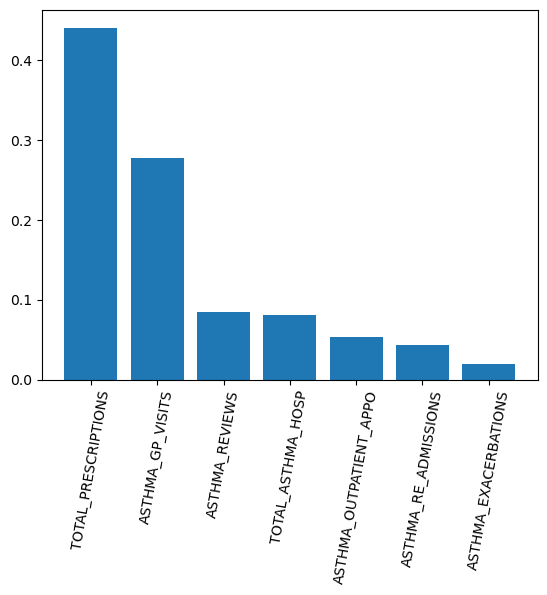

In [35]:
plt.bar(range(input_features.shape[1]),importances[indices],align="center")
plt.xticks(range(input_features.shape[1]),feature_names[indices],rotation=80)
plt.show()


#shows most critical variables

# CLUSTER CENTROIDS: Can help in describing the clusters.

In [36]:
centroids = k_means.cluster_centers_

In [37]:
centroids_df = pd.DataFrame(centroids, columns=input_features.columns)

In [38]:
centroids_df

,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,ASTHMA_REVIEWS,ASTHMA_OUTPATIENT_APPO,TOTAL_PRESCRIPTIONS,ASTHMA_RE_ADMISSIONS,ASTHMA_EXACERBATIONS
0,0.240725,0.201092,0.177011,0.185922,0.266262,0.060275,0.127731
1,0.459520,0.369865,0.361319,0.292354,0.518541,0.142929,0.157046


In [39]:
df_cluster_prepared['cluster'] = k_means.labels_
df_cluster_prepared.head(3)

,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,ASTHMA_REVIEWS,ASTHMA_OUTPATIENT_APPO,TOTAL_PRESCRIPTIONS,ASTHMA_RE_ADMISSIONS,ASTHMA_EXACERBATIONS,cluster
0,0.428571,0.4,0.285714,0.6,0.6,0.333333,0.25,1
1,0.428571,0.2,0.571429,0.0,0.4,0.666667,0.00,1
2,0.285714,0.3,0.142857,0.4,0.4,0.000000,0.25,0


# Using PCA to visualize

In [40]:
from sklearn.decomposition import PCA

In [41]:
#explaining 80 percent of the variance
pca_0 = PCA(0.9)

In [42]:
cluster_pca = pca_0.fit_transform(cluster_data_prepared)

In [43]:
cluster_pca.shape

(1491, 5)

In [44]:
df_pca = pd.DataFrame(cluster_pca, columns=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5'])
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,0.361472,0.315456,0.141470,-0.011062,0.153437
1,0.202788,-0.404548,0.132220,-0.148433,0.515511
2,-0.028654,0.230488,0.001542,0.075275,-0.081535
3,0.216086,-0.137841,-0.079882,-0.120235,-0.145226
4,-0.294622,-0.021333,0.143796,-0.147538,0.247674


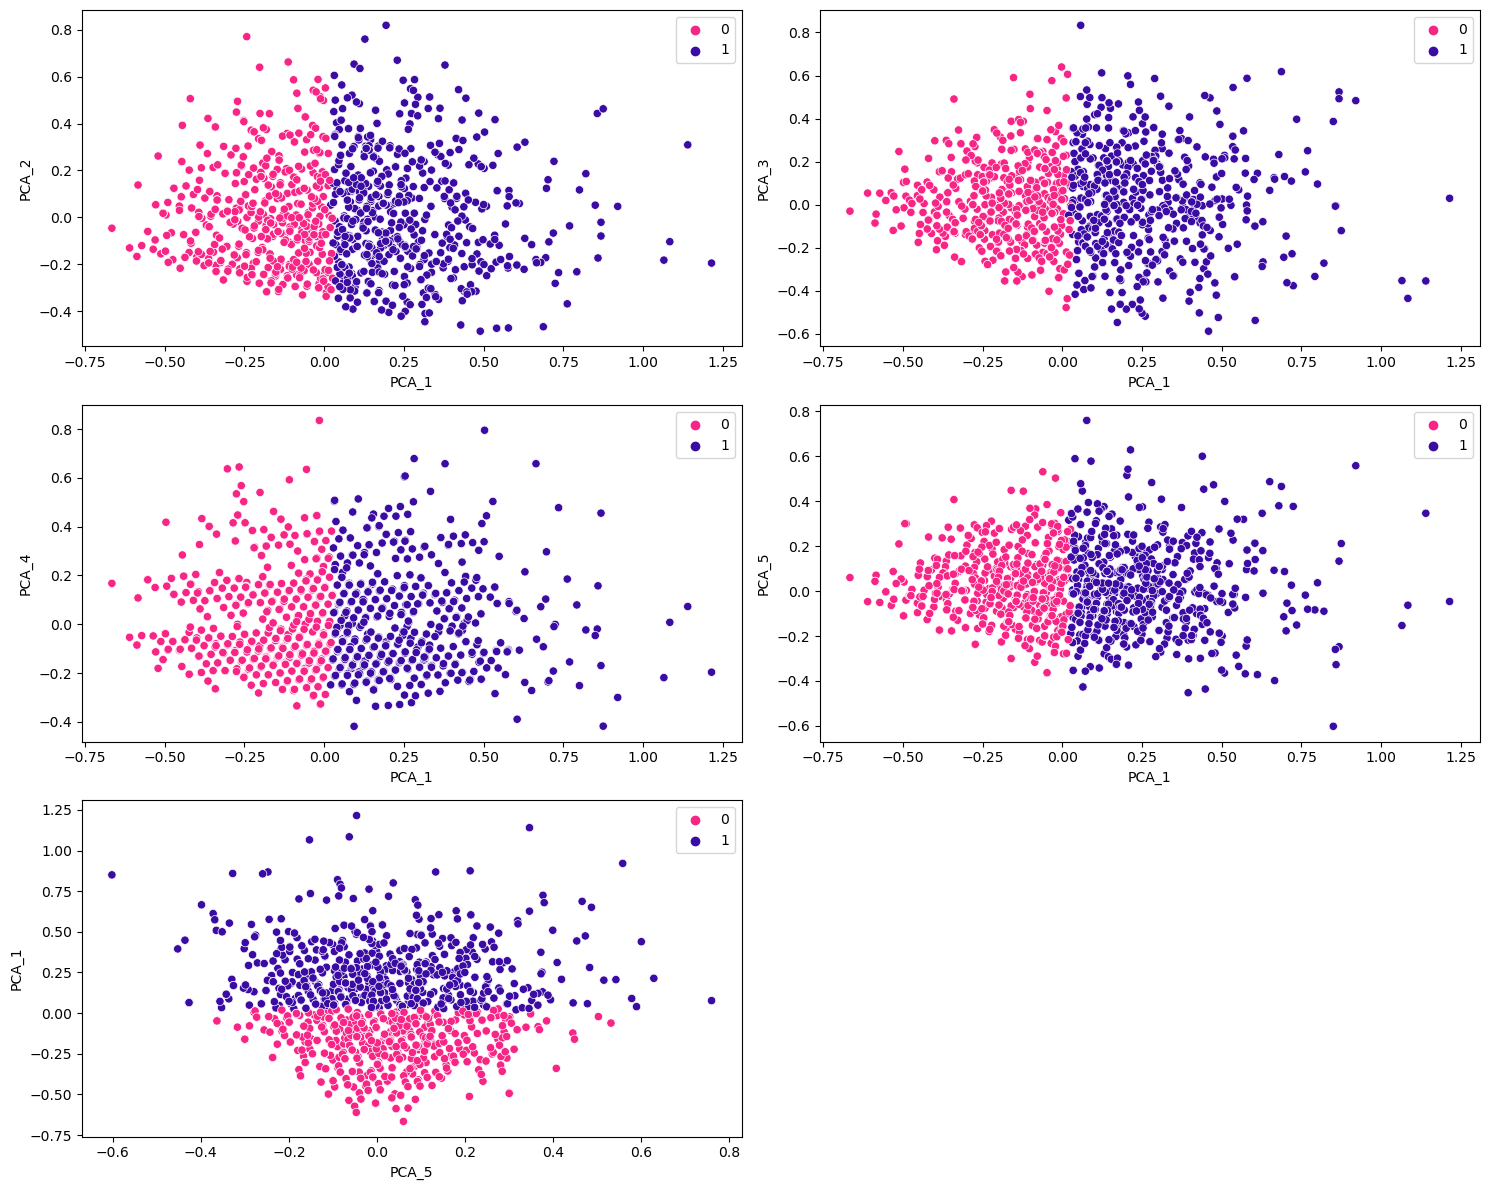

In [45]:
fig, ax = plt.subplots(3,2, figsize=(15,12))
sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_2', hue=cluster_predictions,ax=ax[0,0], palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_3', hue=cluster_predictions,ax=ax[0,1],palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_4', hue=cluster_predictions,ax=ax[1,0],palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_5', hue=cluster_predictions,ax=ax[1,1],palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_5', y = 'PCA_1', hue=cluster_predictions,ax=ax[2,0],palette=['#F72585','#3A0CA3'])

ax[2,1].axis('off')
plt.tight_layout()
plt.show()

# Summary statistics of clusters

In [46]:
data['clusters'] = cluster_predictions

In [47]:
#Number observations per cluster
data['clusters'].value_counts()

0    824
1    667
Name: clusters, dtype: int64

In [48]:

summary_stats = data.groupby('clusters').agg({
                             'ASTHMA_GP_VISITS':['count','min','max','mean','median'],
                             'TOTAL_ASTHMA_HOSP':['min','max','mean','median'], 
                             'EMER_ADM_LAST_12M':['min','max','mean','median'], 
                             'EMER_ADM_BEFORE_LAST_12M':['min','max','mean','median'], 
                             'ASTHMA_EXACERBATIONS':['count','min','max','mean','median'], 
                             'ASTHMA_REVIEWS':['count','min','max','mean','median'],
                             'ASTHMA_OUTPATIENT_APPO':['min','max','mean','median'],
                             'ASTHMA_RE_ADMISSIONS':['min','max','mean','median'],
                             'TOTAL_PRESCRIPTIONS':['min','max','mean','median'],
                             'Income':['count','min','max','mean','median'],
                            'Employment':['min','max','mean','median'],
                            'Health':['min','max','mean','median'],
                            'Education':['count','min','max','mean','median'],
                            'Access_to_Services':['min','max','mean','median'],
                            'Community_Safety':['min','max','mean','median'],
                            'Physical_Environment':['min','max','mean','median'],
                            'Housing':['min','max','mean','median']
                                
                                }).T

In [49]:
print(summary_stats.loc[['Income','Employment','Housing','Health'],:]) 

clusters                     0            1
Income     count    824.000000   667.000000
           min        1.000000     1.000000
           max     1908.000000  1909.000000
           mean     951.205097   973.059970
           median   965.000000   981.000000
Employment min        1.000000     1.000000
           max     1908.000000  1903.000000
           mean     944.503641   975.176912
           median   932.500000  1001.000000
Housing    min        4.000000     2.000000
           max     1909.000000  1909.000000
           mean     957.050971   962.512744
           median  1013.000000   967.000000
Health     min        1.000000     1.000000
           max     1906.000000  1909.000000
           mean     935.631068   958.196402
           median   961.500000   945.000000


In [50]:
print(summary_stats.loc[['Education','Access_to_Services','Community_Safety','Physical_Environment'],:])

clusters                               0            1
Education            count    824.000000   667.000000
                     min       11.000000     2.000000
                     max     1908.000000  1905.000000
                     mean     948.685680   968.853073
                     median   964.500000   941.000000
Access_to_Services   min        1.000000    11.000000
                     max     1907.000000  1909.000000
                     mean     969.702670   967.655172
                     median  1014.500000   979.000000
Community_Safety     min        2.000000     1.000000
                     max     1907.000000  1908.000000
                     mean     948.751214   943.578711
                     median   960.000000   927.000000
Physical_Environment min        1.000000     2.000000
                     max     1908.000000  1909.000000
                     mean     948.799757   941.941529
                     median   942.500000   957.000000


In [51]:
print(summary_stats.loc[['ASTHMA_GP_VISITS','TOTAL_ASTHMA_HOSP','EMER_ADM_LAST_12M','EMER_ADM_BEFORE_LAST_12M'],:]) 

clusters                                  0           1
ASTHMA_GP_VISITS         count   824.000000  667.000000
                         min       0.000000    3.000000
                         max       6.000000   14.000000
                         mean      3.370146    6.433283
                         median    3.000000    6.000000
TOTAL_ASTHMA_HOSP        min       0.000000    0.000000
                         max       6.000000   10.000000
                         mean      2.010922    3.698651
                         median    2.000000    4.000000
EMER_ADM_LAST_12M        min       0.000000    0.000000
                         max       4.000000    5.000000
                         mean      0.702670    1.218891
                         median    1.000000    1.000000
EMER_ADM_BEFORE_LAST_12M min       1.000000    2.000000
                         max       7.000000   14.000000
                         mean      3.599515    6.446777
                         median    4.000000    6

In [52]:
print(summary_stats.loc[['ASTHMA_EXACERBATIONS',
                         'ASTHMA_REVIEWS',
                         'ASTHMA_OUTPATIENT_APPO',
                         'ASTHMA_RE_ADMISSIONS','TOTAL_PRESCRIPTIONS'],:]) 

clusters                                0           1
ASTHMA_EXACERBATIONS   count   824.000000  667.000000
                       min       0.000000    0.000000
                       max       4.000000    4.000000
                       mean      0.510922    0.628186
                       median    0.000000    0.000000
ASTHMA_REVIEWS         count   824.000000  667.000000
                       min       0.000000    0.000000
                       max       5.000000    7.000000
                       mean      1.239078    2.529235
                       median    1.000000    2.000000
ASTHMA_OUTPATIENT_APPO min       0.000000    0.000000
                       max       4.000000    5.000000
                       mean      0.929612    1.461769
                       median    1.000000    1.000000
ASTHMA_RE_ADMISSIONS   min       0.000000    0.000000
                       max       2.000000    3.000000
                       mean      0.180825    0.428786
                       media

# POISSON-ADJUSTED

In [53]:
['ASTHMA_GP_VISITS', 
'TOTAL_ASTHMA_HOSP',
'ASTHMA_REVIEWS',
'ASTHMA_OUTPATIENT_APPO',
'TOTAL_PRESCRIPTIONS',
'ASTHMA_RE_ADMISSIONS',
'ASTHMA_EXACERBATIONS',
 'EMER_ADM_BEFORE_LAST_12M'
                        ]

['ASTHMA_GP_VISITS',
 'TOTAL_ASTHMA_HOSP',
 'ASTHMA_REVIEWS',
 'ASTHMA_OUTPATIENT_APPO',
 'TOTAL_PRESCRIPTIONS',
 'ASTHMA_RE_ADMISSIONS',
 'ASTHMA_EXACERBATIONS',
 'EMER_ADM_BEFORE_LAST_12M']

In [54]:
data['clusters'] = data['clusters'].astype('category')
data['GNDR_CD'] = data['GNDR_CD'].astype('category')

In [55]:
#check for mean and variance

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
formula = ('EMER_ADM_LAST_12M ~ BMI + SMK_STATUS + clusters + GNDR_CD +'
                                       'EMER_ADM_BEFORE_LAST_12M')

In [58]:
poisson = smf.poisson(formula=formula, 
                      data=data).fit()

Optimization terminated successfully.
         Current function value: 1.185935
         Iterations 5


In [59]:
print(poisson.summary())

                          Poisson Regression Results                          
Dep. Variable:      EMER_ADM_LAST_12M   No. Observations:                 1491
Model:                        Poisson   Df Residuals:                     1485
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                 0.06250
Time:                        12:24:29   Log-Likelihood:                -1768.2
converged:                       True   LL-Null:                       -1886.1
Covariance Type:            nonrobust   LLR p-value:                 6.204e-49
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.2701      0.108      2.492      0.013       0.058       0.482
SMK_STATUS[T.Yes]           -0.0978      0.094     -1.041      0.298      -0.282       0.

In [ ]:
#p-value of 0.05
#LLR p-value is statistically significant hence the model can be interpreted

In [60]:
#Saving the coefficients of the variables
poisson_params = poisson.params

In [61]:
#Bringing together the coefficients with their confidence intervals

poisson_df = poisson.conf_int()
poisson_df['IRR'] = poisson_params
poisson_df = poisson_df[['IRR',0,1]].copy()
poisson_df.columns = ['IRR','Lower CI','Upper CI']

In [62]:
poisson_df = np.exp(poisson_df) #calculates the IRR for the variables
poisson_df['pvalues'] = round(poisson.pvalues,4) #getting the pvalues of the variables

In [63]:
print(f"RESULTS")
print(f"Statistically significant features: ")
print()
print(poisson_df[(poisson_df['pvalues']<=0.05) & (poisson_df.index!='Intercept')])

RESULTS
Statistically significant features: 

                               IRR  Lower CI  Upper CI  pvalues
clusters[T.1]             2.958247  2.572617  3.401682      0.0
EMER_ADM_BEFORE_LAST_12M  0.821668  0.793665  0.850660      0.0
